<center>
<h1 style="color:red; font-size:70px;"> FeelNet</h1>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tensorflow import keras
from keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Flatten, Dense, Rescaling, MaxPooling2D, Conv2D, Dropout

## Studio del dataset

In [20]:
trDir = "Dataset/train"  
valDir = "Dataset/test"  
datagen = ImageDataGenerator(rescale=1./255)

# Dataset di training
trDat = datagen.flow_from_directory(
    trDir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

# Dataset di validation
valDat = datagen.flow_from_directory(
    valDir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


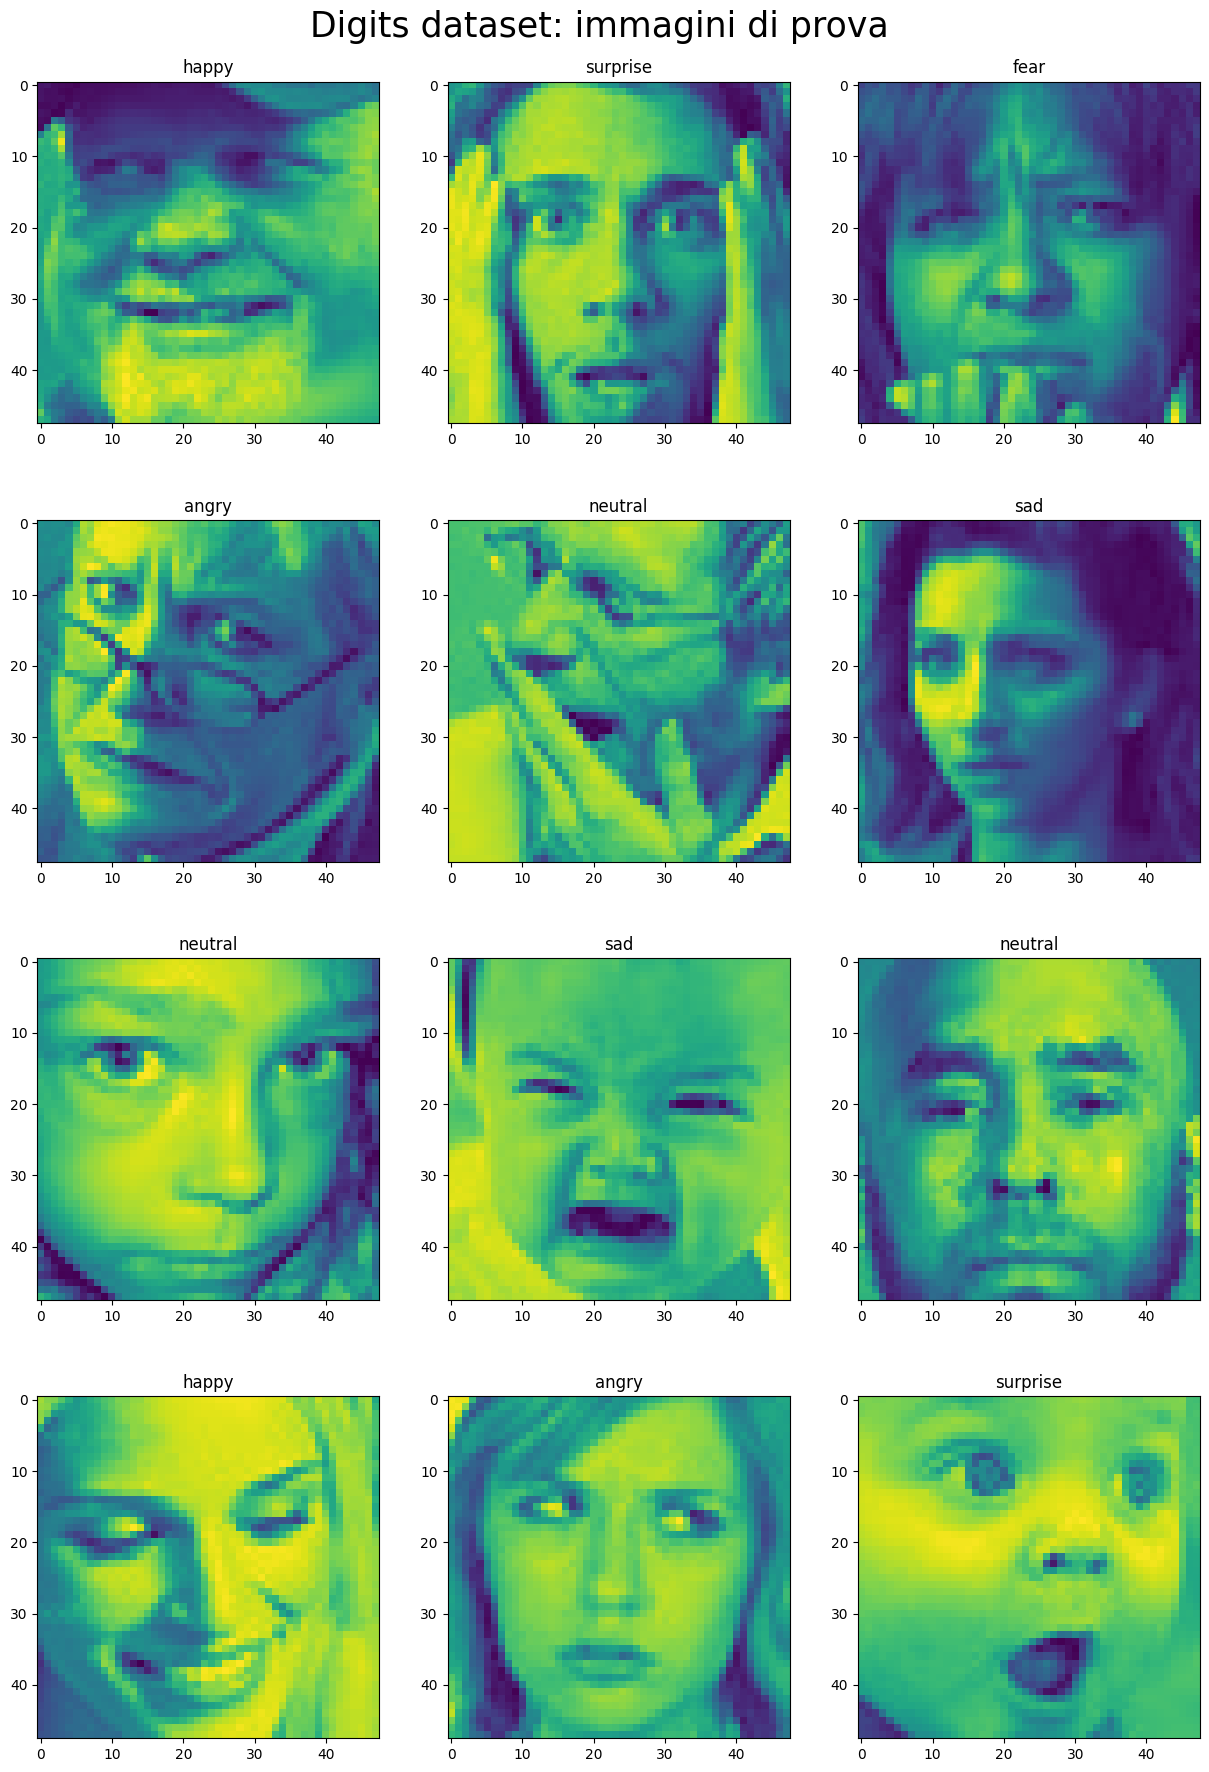

In [21]:
# Funzione per visualizzare alcuni elementi appartenenti al dataset
def studyDat(img, lab, classes):
    fig, ax = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            ax[i][j].imshow(img[5*i+j])
            ax[i][j].set_title(classes[np.argmax(lab[5*i+j])])

    fig.suptitle("Digits dataset: immagini di prova", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()


cls = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
img, lab = next(valDat)
studyDat(img, lab, cls)

## Costruzione della rete

In [22]:
# Funzione per la costruzione del modello
def buildMod(imW, imH, numcl):

    model = Sequential()
    model.add(Input(shape=(imW, imH, 1)))

    # Parte con i filtri convoluzionali
    model.add(Conv2D(16, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D())

    # Parte di classificazione
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(numcl, activation = 'softmax'))

    return model



model = buildMod(48, 48, 7)
plot_model(model, to_file="Immagini/Architettura/iniziale.png", show_shapes=True, show_layer_names=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

## Allenamento del modello

In [23]:
hist = model.fit(trDat, epochs=15, validation_data=valDat)

/home/filippo/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 215s 212ms/step - accuracy: 0.3121 - loss: 1.7173 - val_accuracy: 0.4386 - val_loss: 1.4562
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 178s 198ms/step - accuracy: 0.4594 - loss: 1.4081 - val_accuracy: 0.4944 - val_loss: 1.3207
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 345s 358ms/step - accuracy: 0.5191 - loss: 1.2630 - val_accuracy: 0.5143 - val_loss: 1.2703
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 257s 286ms/step - accuracy: 0.5552 - loss: 1.1758 - val_accuracy: 0.5291 - val_loss: 1.2190
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 369s 410ms/step - accuracy: 0.5878 - loss: 1.0964 - val_accuracy: 0.5373 - val_loss: 1.2163
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 349s 388ms/step - accuracy: 0.6223 - loss: 1.0058 - val_accuracy: 0.5511 - val_loss: 1.2053
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 332s 369ms/step - accuracy: 0.6549 - loss: 0.9302 - val_accuracy: 0.5458 - val_loss: 1.2423
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 373s 415ms/step - accuracy: 0.6901 -

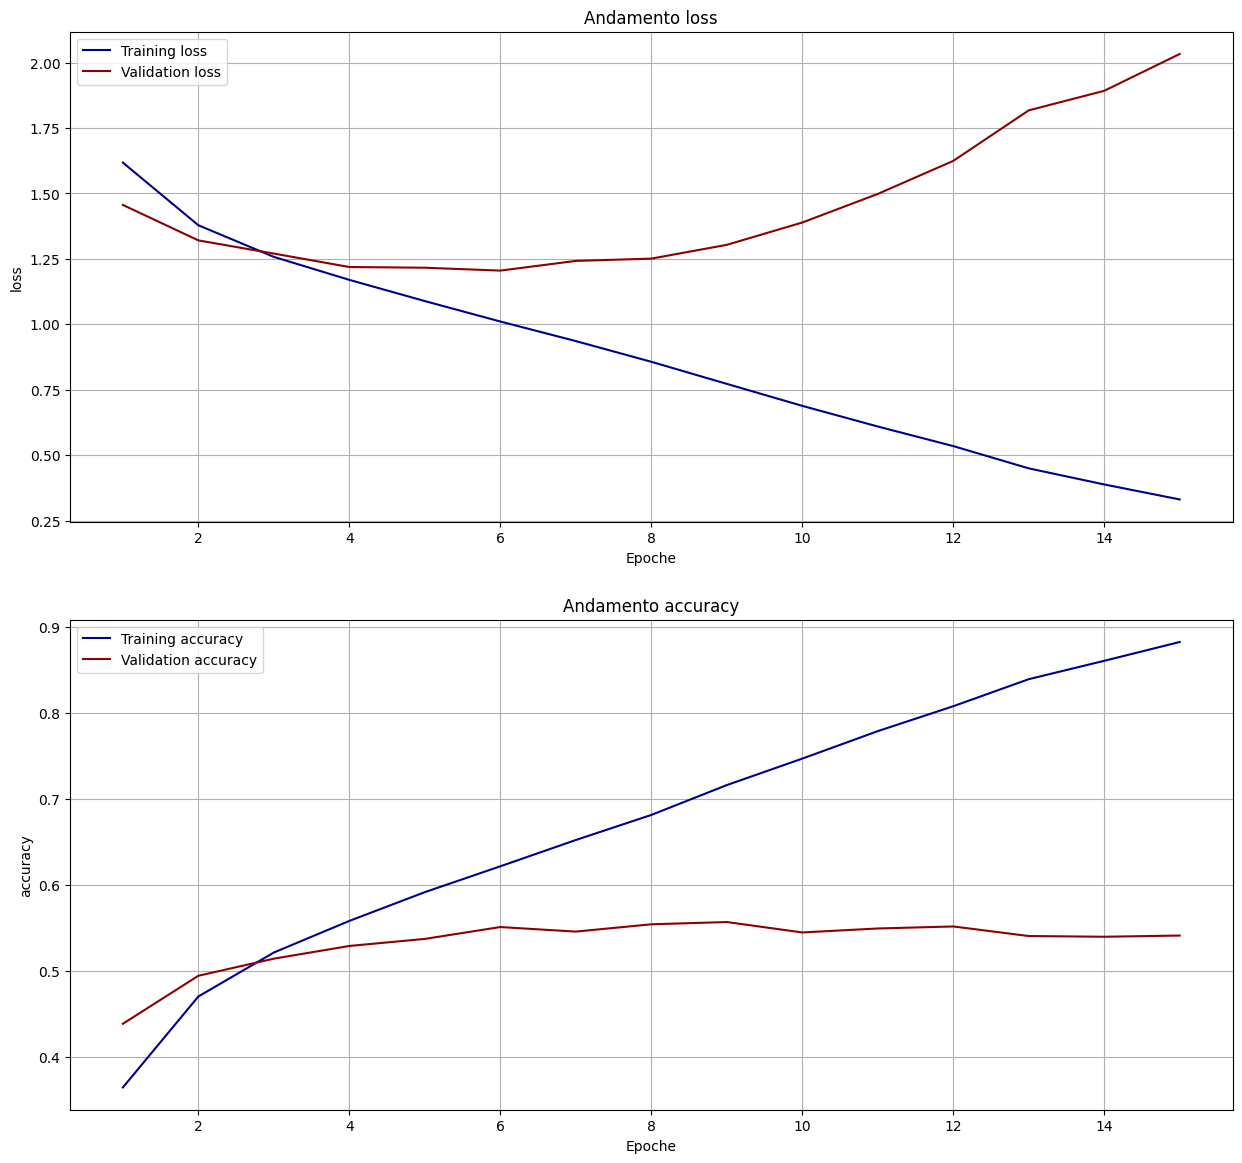

In [24]:
def plotTrInfo(hist):
    # Funzione per graficare l'evoluzione di loss ed accuracy in fase di allenamento
    fig, ax = plt.subplots(2, 1, figsize=(15,14))

    dim = len(hist.history['loss'])
    lab = ['loss', 'accuracy']

    for i, l in enumerate(lab):
        ax[i].plot(np.linspace(1, dim, dim), hist.history[l], color = 'darkblue', label = "Training " + l)
        ax[i].plot(np.linspace(1, dim, dim), hist.history['val_'+l], color = 'darkred', label = "Validation " + l)
        ax[i].set_title("Andamento " + l)
        ax[i].set_xlabel("Epoche")
        ax[i].set_ylabel(l)

        ax[i].legend(loc="best")
        ax[i].grid(True)
    plt.show()
    
plotTrInfo(hist)

## Prove di guess

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


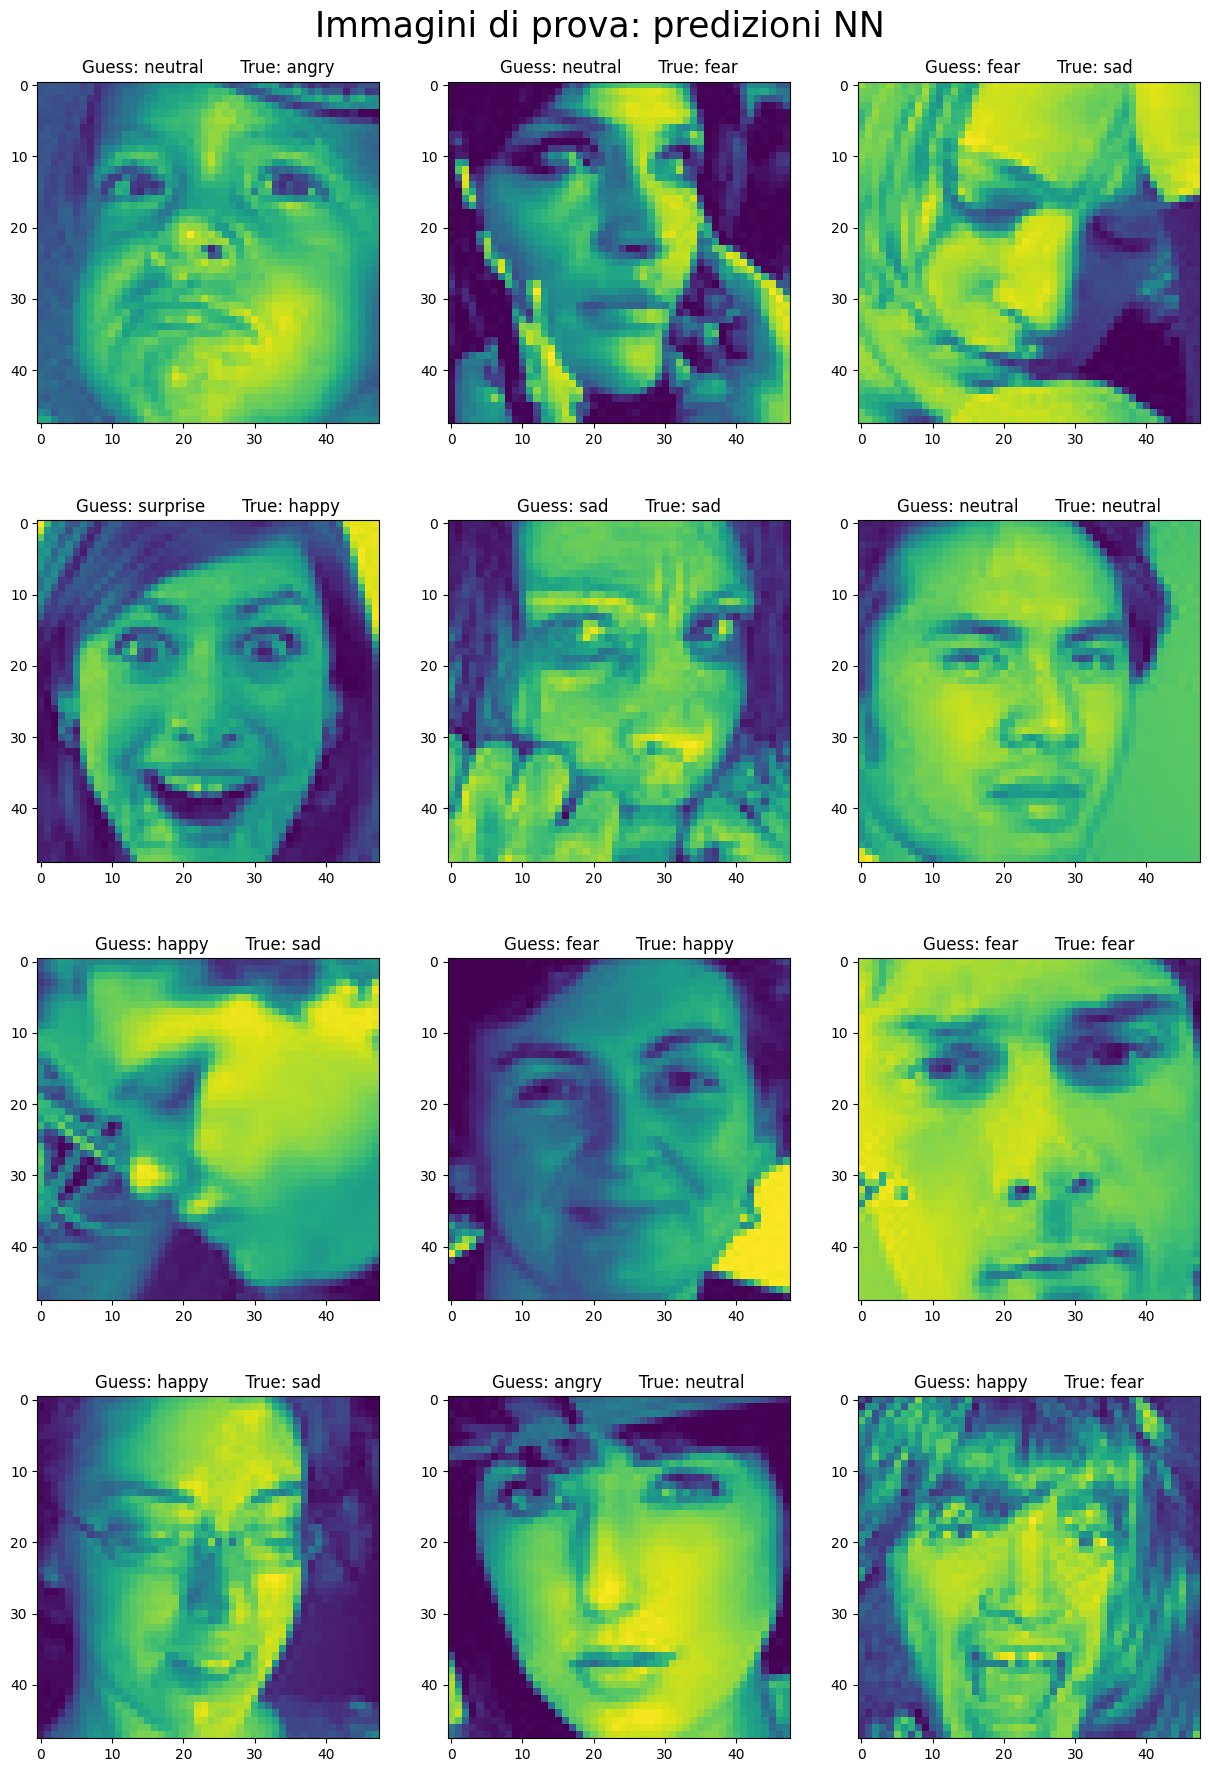

In [31]:
# Funzione per fare delle guess con la rete neurale
def studyPred(model, valDat, titles):

    # Estraggo le immagini e le labels
    images, labels = next(valDat)

    # Funzione per verificare predizioni del modello e posizionamento della bounding box
    fig, ax = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            # Faccio la predizione dell'immagine
            pred = model.predict(np.expand_dims(images[3*i+j, :, :], axis= 0))

            ax[i][j].imshow(images[3*i+j, :, :])
            ax[i][j].set_title("Guess: " + titles[np.argmax(pred)]+ "       True: " + titles[np.argmax(labels[3*i+j])])

    fig.suptitle("Immagini di prova: predizioni NN", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()


cls = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
studyPred(model, valDat, cls)